In [1]:
# DS L2T15
# Exploratory Data Analysis (EDA) on the Titanic dataset


# 1. What question(s) are you trying to solve (or prove wrong)?


In [2]:
# How many survivors?
# What are the splits on passenger classes?
# What are the ages and gender of survivors and non survivors?
# Is there a relationship between age and survival?
# Is there a relationship between gender and survival?
# Is there a relationship between passenger class and survival?
# What patterns and trends can be seen?

In [3]:
# Import packages for calcs & visualisations
import numpy as np
import pandas as pd
import re

# For Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# Data visualization
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. Reading and importing the data

In [4]:
# Load titanic dataset and display the 1st 5 rows
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Display summarised data re dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# View Features
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# printing summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3. What’s missing from the data and how to deal with it?

<AxesSubplot:>

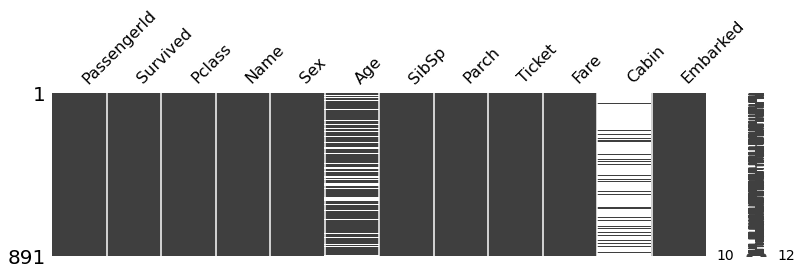

In [8]:
# Visualise missing data
missingno.matrix(df, figsize = (13,3))

In [10]:
# The percentage of missing values across the dataset
df.isnull().sum()/ len(df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
# Number of missing data points per column
missing_values_count = df.isnull().sum()

# The no of missing points in the first ten columns
missing_values_count[0:12]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The bulk of missing data is in 2 columns of the data set, as can be seen in the % missing above:
Age - 177 (20%) ;
Cabin - 687 (77%).

Cabin might not be necessary data so we might drop it later.

# 4. Where are the outliers?

In [12]:
# Create two new dataframes for purposes of analysis
# for discretised continuous variables- numerical
df_bin = df

# for continuous variables - categorical
df_con = df

male      577
female    314
Name: Sex, dtype: int64


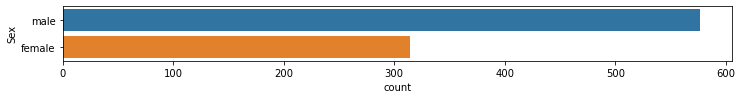

In [13]:
# How many passengers were Male and Female
fig = plt.figure(figsize=(12,1))
sns.countplot(y='Sex', data=df_bin);
print(df_bin.Sex.value_counts())

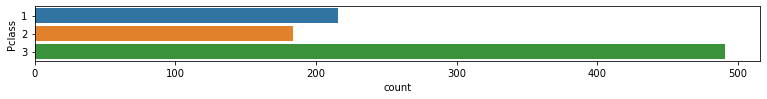

In [14]:
# Passenger class split on the ship
fig = plt.figure(figsize=(13,1))
sns.countplot(y=df_bin['Pclass'], data=df_bin);

<AxesSubplot:ylabel='Frequency'>

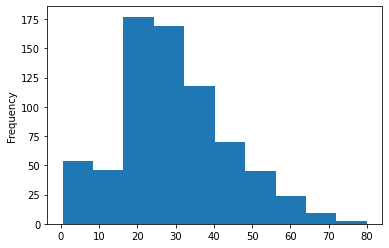

In [15]:
# Age of passengers
df.Age.plot.hist()

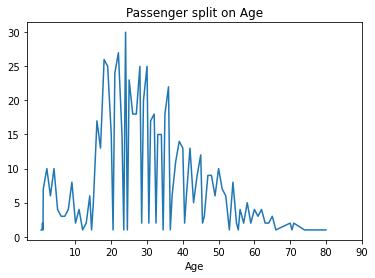

In [16]:
# Line graph for a detailed split across Age of passengers
test = df['PassengerId'].groupby(df['Age']).size()
plot_month = test.plot(title = 'Passenger split on Age', xticks = (range(10,100,10)))

,Sex,Survived
0,female,0.742038
1,male,0.188908


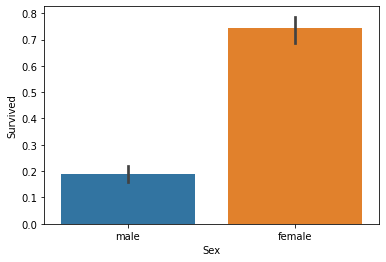

In [17]:
# Gender of passengers plotted against Survived
sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


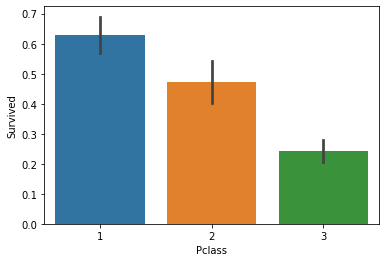

In [18]:
# Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=df)
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

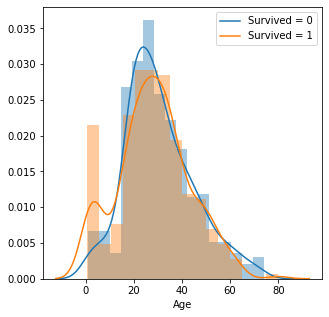

In [19]:
# Visualise age of survivors
# for discretised continuous variables ()
df_bin = df

fig = plt.figure(figsize=(5, 5))
for i in range(0, 7):
    sns.distplot(df_bin.loc[df_bin['Survived'] == i]['Age'], kde_kws={'label': f'Survived = {i}'});

In [20]:
# How many females do we have information for vs males?
df.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [21]:
# How many Survived do we have information for vs males?
df.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


# 5. How can you add, change or remove features to get more out of your data?

In [22]:
# Drop columns - Cabin, Ticket, PassengerId
df.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [23]:
# Most people embarked on their journey from Southhampton port(s)

# Fill the missing Embarked values as S
df.Embarked.fillna('S',inplace=True)

In [24]:
# Replace the NaN values in the Age column with the median

# Fill the missing values in the Age column
df.Age.fillna(28, inplace=True)
df.Age.fillna(28, inplace=True)

In [25]:
# Relook at the percentage of missing values
df.isnull().sum()/ len(df) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64